# <center>Naive Bayes Classifier</center>


In [1]:
# importing libraries
from __future__ import print_function

# To load numpy and pandas
import numpy as np
import pandas as pd



# To import the naive bayes classifiers
from sklearn.naive_bayes import GaussianNB


# To measure accuracy
from sklearn import metrics
from sklearn import model_selection

# To import the scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model



# To support plots
import matplotlib.pyplot as plt

# importing KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#impoerting ROC
from sklearn.metrics import roc_curve, auc
from itertools import cycle


#class with different functions
class DummyScaler:
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        return data

def create_scaler_dummy():
    return DummyScaler()
    
def create_scaler_standard():
    return StandardScaler()

def create_scaler_minmax():
    return MinMaxScaler()

def crete_scaler_binarizer():
    return Binarizer()


create_scaler = create_scaler_standard


def create_model_naive_bayes():
    model = GaussianNB()
    return model




create_model = create_model_naive_bayes


seed = 200
np.set_printoptions(precision=3)

# function for ROC curve for two class only
def ROCcurve(evaluatetype, y, y_prob):
    print('ROC curve')
    # ROC curve code here is for 2 classes only
    if len(np.unique(y)) == 2: 
        fpr, tpr, threshold = metrics.roc_curve(y, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic (' + evaluatetype + ')')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

#function to accuracy of maodel and generating Confusion Martix
def evaluate_model(evaluatetype, y, y_hat, y_prob):
    
    print('Model evaluation (' + evaluatetype + ')')
    print('Accuracy:', metrics.accuracy_score(y, y_hat)*100,"%")
    print('Classification report:')
    print(metrics.classification_report(y, y_hat))
    print('Confusion matrix (' + evaluatetype + ')')
    df = pd.DataFrame({'y_Actual':y, 'y_Predicted':y_hat})
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)


In [2]:
# loading data
df  = pd.read_csv("Avila-DataSet for miniprojects.csv")
num = {"A":0,"B":1,"C":3,"D":4,"E":6,"F":7,"G":8,"H":9,"I":10,"W":11,"X":12,"Y":13}
#df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"] = df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"].map(num)
y = df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"]
    
X = df.drop("Class: A, B, C, D, E, F, G, H, I, W, X, Y",axis = 1)
y = y.to_numpy()
X = X.to_numpy()

In [3]:
print("Training 80% data")
print("\n")

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test  = tts(X,y,test_size = 0.20)

#clf is imported naive bayes model
clf = GaussianNB()
clf.fit(x_train, y_train)

#Predict the response for train dataset
y_pred = clf.predict(x_train)

#using  scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct(%)?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred)*100,"%")

#Classification report
print("\n")
print('Classification report on training data: ')
report = metrics.classification_report(y_train, y_pred)
print(report)

Training 80% data


Accuracy: 29.209848439465645 %


Classification report on training data: 
              precision    recall  f1-score   support

           A       0.55      0.06      0.11      6894
           B       1.00      1.00      1.00         8
           C       0.05      0.14      0.07       162
           D       0.14      0.27      0.19       571
           E       0.28      0.08      0.13      1749
           F       0.29      0.41      0.34      3117
           G       0.14      0.70      0.23       717
           H       0.23      0.79      0.35       820
           I       0.70      0.68      0.69      1330
           W       0.13      0.52      0.21        73
           X       0.54      0.64      0.59       837
           Y       0.54      0.48      0.51       415

    accuracy                           0.29     16693
   macro avg       0.38      0.48      0.37     16693
weighted avg       0.43      0.29      0.26     16693



In [4]:
print("Testing 20% data")
print('\n')


#Predict the response for test dataset using above training model 
y_pred = clf.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

#Classification report
print("\n")
print('Classification report on training data: ')
report = metrics.classification_report(y_test, y_pred)
print(report)

Testing 20% data


Accuracy: 28.150455198850022 %


Classification report on training data: 
              precision    recall  f1-score   support

           A       0.53      0.06      0.11      1678
           B       1.00      1.00      1.00         2
           C       0.03      0.09      0.05        44
           D       0.11      0.22      0.15       134
           E       0.27      0.10      0.14       441
           F       0.29      0.40      0.34       806
           G       0.13      0.70      0.22       176
           H       0.23      0.73      0.34       219
           I       0.69      0.63      0.66       333
           W       0.13      0.50      0.21        16
           X       0.47      0.59      0.52       207
           Y       0.53      0.42      0.47       118

    accuracy                           0.28      4174
   macro avg       0.37      0.45      0.35      4174
weighted avg       0.42      0.28      0.25      4174



In [5]:
print("Model using Coss-validation with 5 folds")
print('\n')

#encoding target data with numeric value for this cross validation 
df1  = pd.read_csv("Avila-DataSet for miniprojects.csv")
num = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8,"I":9,"W":10,"X":11,"Y":12}

df1["Class: A, B, C, D, E, F, G, H, I, W, X, Y"] = df1["Class: A, B, C, D, E, F, G, H, I, W, X, Y"].map(num)
y = df1["Class: A, B, C, D, E, F, G, H, I, W, X, Y"]
    
X = df1.drop("Class: A, B, C, D, E, F, G, H, I, W, X, Y",axis = 1)
y = y.to_numpy()
X = X.to_numpy()


scaler = create_scaler()
# Cross-validation

np.random.seed(seed)
# clear predicted values and predicted probabilities
y_prob = np.zeros(y.shape)
y_hat = np.zeros(y.shape)
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    # Train classifier on training data, predict test data
    
    # Scaling train and test data
    # Train scaler on training set only
    scaler.fit(X[train])
    X_train = scaler.transform(X[train])
    X_test = scaler.transform(X[test])
    
    model = create_model()
    model.fit(X_train, y[train])
    y_prob[test] = model.predict_proba(X_test)[:,1]
    y_hat[test] = model.predict(X_test)

evaluate_model('CV', y, y_hat, y_prob)

Model using Coss-validation with 5 folds


Model evaluation (CV)
Accuracy: 30.445200555901664 %
Classification report:
              precision    recall  f1-score   support

           1       0.54      0.10      0.16      8572
           2       1.00      1.00      1.00        10
           3       0.04      0.12      0.06       206
           4       0.15      0.24      0.18       705
           5       0.30      0.09      0.14      2190
           6       0.29      0.43      0.35      3923
           7       0.16      0.69      0.26       893
           8       0.22      0.80      0.35      1039
           9       0.73      0.65      0.69      1663
          10       0.13      0.51      0.20        89
          11       0.51      0.63      0.56      1044
          12       0.50      0.41      0.45       533

    accuracy                           0.30     20867
   macro avg       0.38      0.47      0.37     20867
weighted avg       0.43      0.30      0.28     20867

Confusion matr

In [6]:
#target data with class in Alphabet 
df  = pd.read_csv("Avila-DataSet for miniprojects.csv")
y = df["Class: A, B, C, D, E, F, G, H, I, W, X, Y"]

ROC


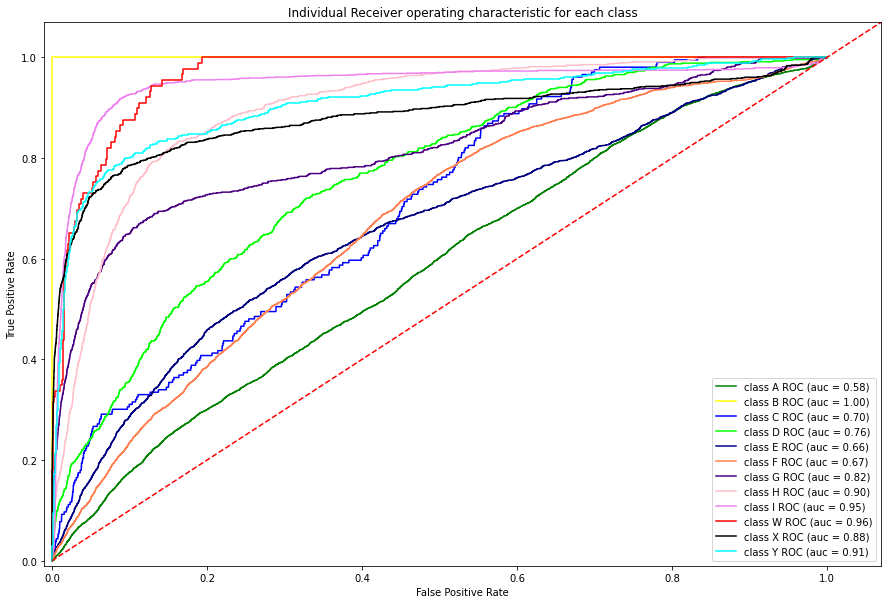

In [7]:
#to generate ROC for all 12 Class

print("ROC")
classes = ["A","B","C","D","E","F","G","H","I","W","X","Y"]
y_bin = label_binarize(y, classes= classes)
n_classes = y_bin.shape[1]


# kfold for 5 fold
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

#classifier
clf = GaussianNB()

#predicting target value
y_score = cross_val_predict(clf, X, y, cv=kfold ,method='predict_proba')

#creating tpr,fpr, roc curve to store for different class as position and negative
tpr = dict()
fpr = dict()
Roc_Auc = dict()



fig = plt.figure(figsize=(15,10))
for i in range(n_classes):
     fpr[i], tpr[i],threshold = metrics.roc_curve(y_bin[:, i], y_score[:, i])
     Roc_Auc[i] = metrics.auc(fpr[i], tpr[i])
colors = ['green', 'yellow','blue','lime','navy','coral','indigo','pink','violet','red','black','cyan','magenta']

#to generate curve with different colour for each class
for i, color in zip(range(n_classes), colors):
     # figure = plt.figure(figsize=(1,1))
       plt.plot(fpr[i], tpr[i], color=color,label=f'class {classes[i]} ROC'' (auc = {1:0.2f})'''.format(i, Roc_Auc[i]))

    
plt.plot([0, 1.2], [0, 1.2], 'r--')
plt.xlim([-0.01, 1.07])
plt.ylim([-0.01, 1.07])


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Individual Receiver operating characteristic for each class')


plt.legend(loc="lower right")
plt.show()